In [2]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [3]:
# load the saved support vector classifier
svc_test = joblib.load("svc.pkl")

In [4]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc_test.coef_[0])[0]
coefs = zip(nonzeroes, abs(svc_test.coef_[0][nonzeroes]))

# sort the coefficients by their value, instead of index
coefs.sort(key = lambda x: x[1], reverse=True)

for coef in coefs:
    print coef

(1792420, 0.8521683020114752)
(1570048, 0.13896359367866379)
(1531647, 0.071003906648946527)
(813895, 0.066174821565107705)
(2334997, 0.063356478223209625)
(1229091, 0.049189378794699992)
(293783, 0.032660924584195894)
(1433155, 0.026776188122684948)
(1792082, 0.02615358604720739)
(1673845, 0.018471977595248757)
(2308447, 0.016627636082769064)
(2274388, 0.016022202770017001)
(2187885, 0.011291653550972126)
(2319627, 0.010663310015572929)
(775746, 0.0094911924930659794)
(2063747, 0.0091052657075714454)
(200986, 0.0086513202239529366)
(534975, 0.0079878700555549072)
(878875, 0.0077632981900203129)
(1911970, 0.0064464911544343424)
(2453399, 0.0046086161199611645)
(1232530, 0.003637698627104031)
(1986871, 0.0033355966735648321)
(271169, 0.0031083814253290792)
(767366, 0.0023779262070200619)
(1893821, 0.0018933265733373909)
(926831, 0.0017484078882197983)
(2221351, 0.0017458848913362807)
(1741051, 0.0011855280965434591)
(94715, 0.00082814678479318116)
(1430873, 0.00081719443194071663)
(8932

In [7]:
# save just the coefficient values
firstCoefs = [coef[0] for coef in coefs]
indices = np.asarray(firstCoefs)

# dump the coefficients for tiling analysis
indices.dump("coefs.pkl")

In [8]:
# load the saved support vector classifier with the hazel exclusion
svc_test_no_hazel = joblib.load("svc_no_hazel.pkl")

In [9]:
# retrieve all the nonzero coefficients and zip them with their respective indices
nonzeroes = np.nonzero(svc_test_no_hazel.coef_[0])[0]
no_hazel_coefs = zip(nonzeroes, svc_test_no_hazel.coef_[0][nonzeroes])

# sort the coefficients by their value, instead of index
no_hazel_coefs.sort(key = lambda x: x[1], reverse=True)

for coef in no_hazel_coefs:
    print coef

(1792420, 0.93262381385479243)
(1570048, 0.16877755465448538)


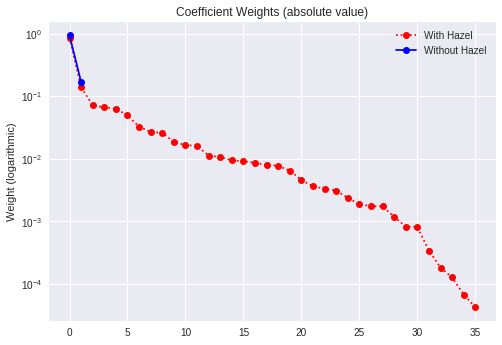

In [11]:
withHazel, = plt.plot([x for x in range(len(coefs))], [coef[1] for coef in coefs], ':ro')
withoutHazel, = plt.plot([x for x in range(len(no_hazel_coefs))], [coef[1] for coef in no_hazel_coefs], '-bo')

plt.legend([withHazel, withoutHazel], ["With Hazel", "Without Hazel"])
plt.title("Coefficient Weights (absolute value)")
plt.ylabel("Weight (logarithmic)")
plt.yscale('log')
plt.savefig("Coefficients_desc.png", dpi=300, transparent=True)
plt.show()